# ⭐🐱⭐ **Preparing Environment** ⭐🐱⭐

In [182]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# ⭐🐱⭐ **Creating Dummy Dataset** ⭐🐱⭐

In [183]:
# # Total item that watched by user
# total_watch = random.randint(5000, 50000)

# # Generate random user_ids
# num_users = random.randint(100, 500)
# user_ids = [random.randint(1, num_users) for _ in range(total_watch)]

# # Generate random item_ids
# num_item = random.randint(20, 200)
# item_ids = [random.randint(1, num_item) for _ in range(total_watch)]

# # Generate random range_time
# range_time = np.random.normal(loc = 10, scale = 5, size = total_watch)
# range_time = np.clip(range_time, 0, 600)
# range_time = list(range_time)

# # Generate random timestamps
# start_timestamp = pd.Timestamp('2015-01-01')
# end_timestamp = pd.Timestamp('2022-12-31')
# timestamps = [pd.Timestamp(random.randint(start_timestamp.value, end_timestamp.value), unit='ns') for _ in range(total_watch)]

# # Create DataFrame
# df = pd.DataFrame({'user_id': user_ids, 'item_id': item_ids, 'range_time': range_time, 'timestamp': timestamps})

# # mengurutkan dataframe berdasarkan user_id ascending dan item_id ascending
# df = df.sort_values(by=['user_id', 'item_id', 'range_time', 'timestamp'], ascending=[True, True, False, False])
# df = df.reset_index(drop=True)

# # Save dataset to csv
# df.to_csv('item_view.csv', index=False)
# df.head(20)

# ⭐🐱⭐ **Understanding Dataset** ⭐🐱⭐

In [184]:
# Load the dataset from CSV
df = pd.read_csv('item_view.csv')

In [185]:
print("Number of user :", num_users)
print("Number of item :", num_item)
print("Total watched items :", total_watch)

watch_per_user = int(total_watch/num_users)
print("Estimated total watched item per user :", watch_per_user)

Number of user : 112
Number of item : 177
Total watched items : 28830
Estimated total watched item per user : 257


In [186]:
# Count total item that viewed for each user_id
view_count1 = df.groupby('user_id').size().reset_index(name='view_count')
view_count1.head(10)

,user_id,view_count
0,1,237
1,2,275
2,3,285
3,4,257
4,5,232
5,6,252
6,7,263
7,8,271
8,9,268
9,10,287


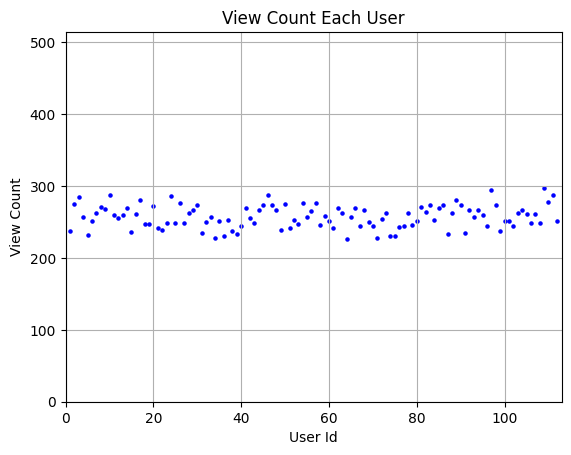

In [187]:
# Build scatter plot to visualize number of item that had been seen by each user
plt.scatter(view_count1['user_id'], view_count1['view_count'], color='blue', s=5)

# Add title
plt.title('View Count Each User')
plt.xlabel('User Id')
plt.ylabel('View Count')

# Add grid
plt.grid(True)

# Determine length of each axis
plt.xlim(0, num_users + 1)
plt.ylim(0, watch_per_user * 2)

# Show the plot
plt.show()

# ⭐🐱⭐  **Preprocessing Dataset** ⭐🐱⭐

In [188]:
# Change timestamp format
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')

# Group by user_id and item_id, select last row, and sum range_time
df1 = df.groupby(['user_id', 'item_id']).agg({'range_time': 'sum', 'timestamp': 'last'}).reset_index()
df1.head(10)

,user_id,item_id,range_time,timestamp
0,1,1,10.095928,2020-11-02 13:23:58
1,1,2,5.914218,2019-06-16 00:23:09
2,1,3,36.868332,2016-05-19 00:44:09
3,1,4,11.073433,2022-09-21 05:01:56
4,1,5,14.152436,2021-08-09 09:00:54
5,1,6,6.942924,2016-07-30 20:05:27
6,1,7,62.009624,2020-11-25 05:13:28
7,1,9,9.324120,2017-07-23 12:33:30
8,1,10,19.307064,2016-11-20 10:23:18
9,1,12,16.556222,2016-10-27 10:46:54


In [189]:
# Melakukan pivot tabel
df_pivot = df1.pivot(index='user_id', columns='item_id', values='range_time')

# Mengganti nama kolom menjadi item_id1, item_id2, item_id3, hingga item_id20
df_pivot.columns = ['item_id_' + str(col) for col in df_pivot.columns]

# Menghapus index kolom agar tidak terdapat nama kolom pada indexnya
df_pivot.columns.name = None

# Menggabungkan kembali data duration dengan index user_id
df_pivot = df_pivot.reset_index().rename_axis(None, axis=1)
df_pivot.head(10)

,user_id,item_id_1,item_id_2,item_id_3,item_id_4,item_id_5,item_id_6,item_id_7,item_id_8,item_id_9,...,item_id_168,item_id_169,item_id_170,item_id_171,item_id_172,item_id_173,item_id_174,item_id_175,item_id_176,item_id_177
0,1,10.095928,5.914218,36.868332,11.073433,14.152436,6.942924,62.009624,NaN,9.324120,...,26.646466,NaN,2.837686,12.291355,24.000052,10.725256,28.915807,25.245789,22.619563,14.950105
1,2,12.009833,28.110729,2.760994,14.474194,23.282528,13.386555,NaN,17.907390,6.808755,...,NaN,23.610457,27.043852,NaN,18.881343,27.762294,NaN,NaN,16.759085,15.613369
2,3,2.636685,19.830213,NaN,18.017252,20.645360,37.617684,6.328098,0.000000,NaN,...,37.161822,NaN,NaN,NaN,17.559784,NaN,33.574803,33.334057,22.420112,14.756368
3,4,21.519157,10.060196,31.590829,8.971423,15.548865,36.116065,NaN,26.219740,25.782833,...,0.000000,46.761155,NaN,8.748216,NaN,5.462497,7.351213,NaN,NaN,54.683334
4,5,7.119571,38.864333,23.202528,28.064796,6.926794,NaN,15.758430,NaN,11.629803,...,20.299587,35.795796,NaN,11.889991,NaN,2.433281,46.180415,NaN,NaN,NaN
5,6,48.537069,14.100373,20.915627,11.774391,10.567051,35.748665,14.920826,30.274101,15.506792,...,13.466052,22.837449,30.330833,NaN,2.441912,10.619552,NaN,33.694518,26.210344,33.108787
6,7,16.375963,18.130108,9.340163,31.135821,NaN,14.237926,16.756553,13.515585,NaN,...,25.489107,NaN,14.933013,19.972963,NaN,17.882646,NaN,19.818457,7.109713,NaN
7,8,22.158434,8.140763,NaN,NaN,NaN,5.562588,29.300358,14.248523,NaN,...,NaN,NaN,24.632644,NaN,35.383122,26.615547,68.453975,4.599224,NaN,NaN
8,9,11.132131,NaN,11.985306,NaN,5.146340,29.306661,15.120026,NaN,12.654368,...,8.537022,13.964023,9.753213,0.000000,25.322213,19.873986,29.724696,28.914945,18.828445,20.853940
9,10,39.838538,24.003122,NaN,NaN,29.752043,18.743801,25.098259,10.691406,14.691982,...,18.189819,13.972692,15.846156,4.848828,NaN,NaN,8.340692,7.179458,8.087364,8.618860


In [190]:
# Determine number of item that last viewed for each user for train model
num_last_viewed = 150

# Determine number of recommender items that recommended for each user
items_to_recommend = 10

In [191]:
# Mengurutkan DataFrame berdasarkan user_id dan timestamp secara menurun (descending)
df = df.sort_values(['user_id', 'timestamp'], ascending=[True, False])

# Menghapus baris dengan timestamp paling lama untuk setiap user
df = df.groupby('user_id').head(num_last_viewed)

# Mengurutkan DataFrame berdasarkan user_id dan timestamp secara menurun (descending)
df = df.sort_values(['user_id', 'item_id','timestamp'], ascending=[True, True, False]).reset_index()

# Menggabungkan baris yang mempunyai user_id dan item_id yang sama
df = df.groupby(['user_id', 'item_id']).agg({'range_time': 'sum', 'timestamp': 'last'}).reset_index()
df.head(25)

,user_id,item_id,range_time,timestamp
0,1,1,10.095928,2020-11-02 13:23:58
1,1,2,5.914218,2019-06-16 00:23:09
2,1,3,11.907646,2019-06-06 12:15:22
3,1,4,11.073433,2022-09-21 05:01:56
4,1,5,14.152436,2021-08-09 09:00:54
5,1,7,62.009624,2019-04-30 23:14:42
6,1,10,19.307064,2021-02-02 05:53:58
7,1,13,44.632174,2018-06-23 22:27:16
8,1,14,19.121370,2020-11-05 04:13:31
9,1,15,11.358065,2021-09-09 11:16:15


In [192]:
# Change value in column "range_time" depent on conditions
df.loc[(df['range_time'] >= 0) & (df['range_time'] <= 5 ), 'range_time'] = 1
df.loc[(df['range_time'] >  5) & (df['range_time'] <= 10), 'range_time'] = 2
df.loc[(df['range_time'] > 10) & (df['range_time'] <= 15), 'range_time'] = 3
df.loc[(df['range_time'] > 15) & (df['range_time'] <= 20), 'range_time'] = 4
df.loc[ df['range_time'] > 20, 'range_time'] = 5

# Change data type in column 'range_time' to int
df['range_time'] = df['range_time'].astype(int)

# Change column name from range_time to interest
df = df.rename(columns={'range_time': 'interest'})
df.head(10)

,user_id,item_id,interest,timestamp
0,1,1,3,2020-11-02 13:23:58
1,1,2,2,2019-06-16 00:23:09
2,1,3,3,2019-06-06 12:15:22
3,1,4,3,2022-09-21 05:01:56
4,1,5,3,2021-08-09 09:00:54
5,1,7,5,2019-04-30 23:14:42
6,1,10,4,2021-02-02 05:53:58
7,1,13,5,2018-06-23 22:27:16
8,1,14,4,2020-11-05 04:13:31
9,1,15,3,2021-09-09 11:16:15


In [193]:
# Menghitung banyaknya video yang ditonton per user_id
view_count2 = df.groupby('user_id').size().reset_index(name='view_count')
view_count2.head(10)

,user_id,view_count
0,1,98
1,2,107
2,3,97
3,4,102
4,5,99
5,6,105
6,7,106
7,8,99
8,9,100
9,10,101


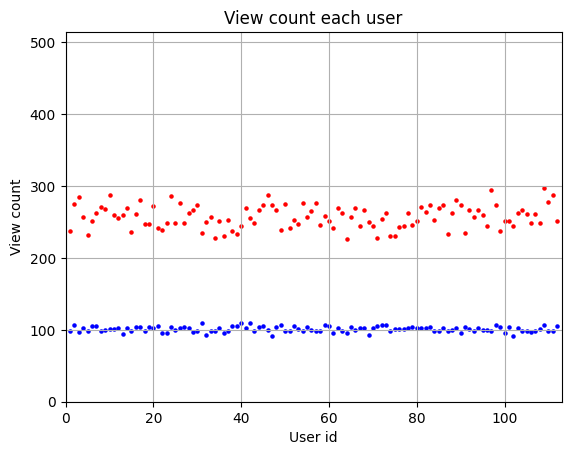

In [194]:
# Build scatter plot to visualize number of item that had been seen by each user
plt.scatter(view_count1['user_id'], view_count1['view_count'], color='red', s=5)
plt.scatter(view_count2['user_id'], view_count2['view_count'], color='blue', s=5)

# Add title
plt.title('View count each user')
plt.xlabel('User id')
plt.ylabel('View count')

# Add grid
plt.grid(True)

# Determine length of each axis
plt.xlim(0, num_users + 1)
plt.ylim(0, watch_per_user*2)
plt.show()

# ⭐🐱⭐  **Make Collaborative Filtering Model** ⭐🐱⭐

In [195]:
# Split dataset
train_data, val_data = train_test_split(df, test_size=.20)

# Get unique user and item IDs
unique_user_ids = np.unique(df['user_id'])
unique_item_ids = np.unique(df['item_id'])

# Create mapping from IDs to indices
user_id_to_idx = {old: new for new, old in enumerate(unique_user_ids)}
item_id_to_idx = {old: new for new, old in enumerate(unique_item_ids)}

# Replace IDs with indices in the data
train_data['user_id'] = train_data['user_id'].map(user_id_to_idx)
train_data['item_id'] = train_data['item_id'].map(item_id_to_idx)
val_data['user_id'] = val_data['user_id'].map(user_id_to_idx)
val_data['item_id'] = val_data['item_id'].map(item_id_to_idx)

In [196]:
# Set up the TensorFlow model
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_size)
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_size)
        self.dense_layers = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
        ])
        self.prediction_layer = tf.keras.layers.Dense(1, activation='linear')

    def call(self, inputs):
        user_embedded = self.user_embedding(inputs[:, 0])
        item_embedded = self.item_embedding(inputs[:, 1])
        concatenated = tf.keras.layers.concatenate([user_embedded, item_embedded])
        dense_out = self.dense_layers(concatenated)
        return self.prediction_layer(dense_out)

In [198]:
# Initialize model
model = RecommenderNet(num_users=len(user_id_to_idx), num_items=len(item_id_to_idx), embedding_size=64)
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

# Create TensorFlow dataset
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_data[['user_id', 'item_id']].values, train_data['interest'].values)).shuffle(len(train_data)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_data[['user_id', 'item_id']].values, val_data['interest'].values)).batch(batch_size)

# Train model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
284/284 [==============================] - 2s 3ms/step - loss: 2.8867 - mean_absolute_error: 2.8867 - val_loss: 2.0951 - val_mean_absolute_error: 2.0951
Epoch 2/50
284/284 [==============================] - 1s 3ms/step - loss: 1.2796 - mean_absolute_error: 1.2796 - val_loss: 1.1085 - val_mean_absolute_error: 1.1085
Epoch 3/50
284/284 [==============================] - 1s 3ms/step - loss: 1.1029 - mean_absolute_error: 1.1029 - val_loss: 1.0968 - val_mean_absolute_error: 1.0968
Epoch 4/50
284/284 [==============================] - 1s 3ms/step - loss: 1.0937 - mean_absolute_error: 1.0937 - val_loss: 1.0915 - val_mean_absolute_error: 1.0915
Epoch 5/50
284/284 [==============================] - 1s 3ms/step - loss: 1.0907 - mean_absolute_error: 1.0907 - val_loss: 1.0900 - val_mean_absolute_error: 1.0900
Epoch 6/50
284/284 [==============================] - 1s 4ms/step - loss: 1.0896 - mean_absolute_error: 1.0896 - val_loss: 1.0905 - val_mean_absolute_error: 1.0905
Epoch 7/50
284/2

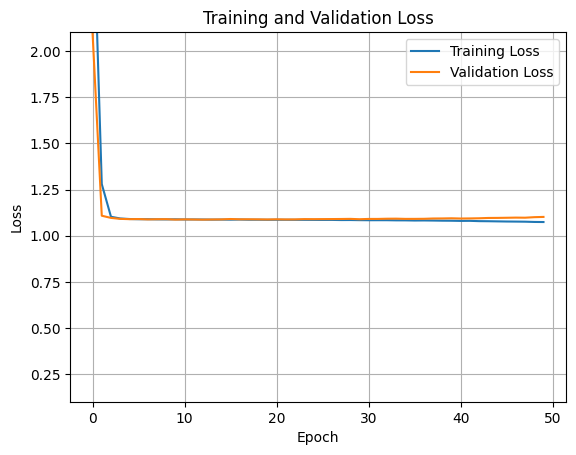

In [199]:
# Plot history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Determine length for y-axis
plt.ylim(history.history['val_loss'][-1] - 1, history.history['val_loss'][-1] + 1)

# Add grid and legend
plt.grid(True)
plt.legend()
plt.show()

# ⭐🐱⭐  **Print Recommender Product** ⭐🐱⭐

In [204]:
# Create a DataFrame of all user-item pairs that have not been viewed
user_item_pairs = []
for user_id in unique_user_ids:
    user_items_duration = df[df['user_id'] == user_id]['item_id'].values
    user_items_unviewed = np.setdiff1d(unique_item_ids, user_items_duration)
    for item_id in user_items_unviewed:
        user_item_pairs.append([user_id, item_id])
user_item_df = pd.DataFrame(user_item_pairs, columns=['user_id', 'item_id'])

# Map IDs to indices in the user-item DataFrame
user_item_df['user_id'] = user_item_df['user_id'].map(user_id_to_idx)
user_item_df['item_id'] = user_item_df['item_id'].map(item_id_to_idx)

# Make predictions for all user-item pairs
user_item_array = user_item_df[['user_id', 'item_id']].values
iterest_pred = model.predict(user_item_array).flatten()

# Add predicted duration to the user-item DataFrame
user_item_df['iterest_pred'] = iterest_pred

266/266 [==============================] - 0s 1ms/step


In [206]:
# Get the top-rated items for each user
top_items = user_item_df.groupby('user_id').apply(lambda x: x.nlargest(items_to_recommend, 'iterest_pred')).reset_index(drop=True)

# Map indices back to IDs
top_items['user_id'] = top_items['user_id'].map({v: k for k, v in user_id_to_idx.items()})
top_items['item_id'] = top_items['item_id'].map({v: k for k, v in item_id_to_idx.items()})

# Print the results
for user_id, items in top_items.groupby('user_id'):
    print(f"User {user_id} recommended :")
    for index, row in items.iterrows():
        item_id = row['item_id']
        iterest_pred = row['iterest_pred']
        print(f"- item {item_id} with predicted interest {iterest_pred:.2f}")
    print()

User 1 recommended :
- item 111.0 with predicted interest 4.10
- item 127.0 with predicted interest 3.71
- item 83.0 with predicted interest 3.41
- item 131.0 with predicted interest 3.31
- item 21.0 with predicted interest 3.29
- item 134.0 with predicted interest 3.21
- item 81.0 with predicted interest 3.21
- item 152.0 with predicted interest 3.20
- item 25.0 with predicted interest 3.16
- item 47.0 with predicted interest 3.16

User 2 recommended :
- item 111.0 with predicted interest 4.05
- item 3.0 with predicted interest 3.81
- item 162.0 with predicted interest 3.66
- item 73.0 with predicted interest 3.66
- item 127.0 with predicted interest 3.59
- item 131.0 with predicted interest 3.21
- item 167.0 with predicted interest 3.15
- item 54.0 with predicted interest 3.15
- item 4.0 with predicted interest 3.12
- item 33.0 with predicted interest 3.12

User 3 recommended :
- item 3.0 with predicted interest 3.82
- item 115.0 with predicted interest 3.60
- item 162.0 with predict